In [55]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from mpl_toolkits.mplot3d import Axes3D
from pylab import *

pd.options.mode.chained_assignment = None  # default='warn'

Parsing the csv file into dataframe.

In [56]:
tokyo = pd.read_csv("C:/Users/gujju/Dropbox/eScience-MachineLearning/Jugal/Tokyo-Cruise-DataSet/tokyo.csv")
tokyo.head()

,﻿date,X01fsc,Y01chl,Z01pe,timeindex
0,11.0,0.04,-0.52,-0.16,0.0
1,11.0,-0.89,-0.31,0.13,0.0
2,11.0,-0.55,-0.13,-0.24,0.0
3,11.0,1.16,-0.19,-1.13,0.0
4,11.0,-0.87,-0.74,0.11,0.0


Creating multiple sub-dataframes based on unique values of **timeindex** column.  

In [57]:
tokyo_groups = tokyo.groupby('timeindex')
tokyo_groups.size()
print(len(tokyo_groups))

88


Using __KMeans__ clustering algorithm to find 3 clusters out of each 3-min interval data. These 3 cluster centroid represent possible 3 different species of microbes/ 3 different family of microbes, which are having some distinct property (fsc, chl, pe). 

In [58]:
kmeans = KMeans(n_clusters=3)

Creating a file which wirtes x,y,z components of 3 centroids obtained from clustering algorithm.
Here we have 88 such 3-min intervals. Thus, 88 rows in this file(excluding the column headers).

In [59]:
#Uncomment if you have generated the file. When you generate this file again and again, it is observed that the values of the
#computed cluster is changing slightly. There must be some random thing which is generating different  everytime.
'''
cluster_centers = open('C:/Users/gujju/Dropbox/eScience-MachineLearning/Jugal/Tokyo-Cruise-DataSet/IPython-Notebook-Work/Cluster_Centers.csv', 'w')
cluster_centers.write('x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3')
cluster_centers.write('\n')

for name, group in tokyo_groups:
    temp_df = group
    temp_df.drop(temp_df.columns[[0, 4]], axis=1, inplace=True)
    kmeans = kmeans.fit(temp_df)
    centers_list = kmeans.cluster_centers_.tolist()
    for row in centers_list:
        for column in row:
            cluster_centers.write('%f,' % column)
            
        
    cluster_centers.write('\n')
 

cluster_centers.flush()
cluster_centers.close()
'''

"\ncluster_centers = open('C:/Users/gujju/Dropbox/eScience-MachineLearning/Jugal/Tokyo-Cruise-DataSet/IPython-Notebook-Work/Cluster_Centers.csv', 'w')\ncluster_centers.write('x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3')\ncluster_centers.write('\n')\n\nfor name, group in tokyo_groups:\n    temp_df = group\n    temp_df.drop(temp_df.columns[[0, 4]], axis=1, inplace=True)\n    kmeans = kmeans.fit(temp_df)\n    centers_list = kmeans.cluster_centers_.tolist()\n    for row in centers_list:\n        for column in row:\n            cluster_centers.write('%f,' % column)\n            \n        \n    cluster_centers.write('\n')\n \n\ncluster_centers.flush()\ncluster_centers.close()\n"

In [60]:
centers_df = pd.read_csv("C:/Users/gujju/Dropbox/eScience-MachineLearning/Jugal/Tokyo-Cruise-DataSet/IPython-Notebook-Work/Cluster_Centers.csv", index_col= False)
print(centers_df.shape)

(88, 9)


In [61]:
print(centers_df.head())

        x_1       y_1       z_1       x_2       y_2       z_2       x_3  \
0 -0.401228 -0.368359 -0.616871  2.257984  2.246162  0.368047 -0.222944   
1  2.265909  2.362045  0.352500 -0.241098 -0.387683  0.385244 -0.405902   
2  2.041681  2.036965 -0.056224 -0.222114 -0.366600 -0.263475  2.683889   
3  2.402419  2.500737  3.806047 -0.204528 -0.360016 -0.252650  2.027667   
4  2.058617  2.081683 -0.048431 -0.175157 -0.361852 -0.258068  2.688994   

        y_3       z_3  
0 -0.359351  0.366502  
1 -0.385024 -0.673707  
2  3.167153  3.570694  
3  2.028057 -0.060294  
4  2.919770  3.868879  


In [62]:
x1_mean = np.mean(centers_df.x_1)
y1_mean = np.mean(centers_df.y_1)
z1_mean = np.mean(centers_df.z_1)

x2_mean = np.mean(centers_df.x_2)
y2_mean = np.mean(centers_df.y_2)
z2_mean = np.mean(centers_df.z_2)

x3_mean = np.mean(centers_df.x_3)
y3_mean = np.mean(centers_df.y_3)
z3_mean = np.mean(centers_df.z_3)

Calculating mean of all three centroids and then calculating distance of all the 88 centroids from the mean value.

In [63]:
mean_vector_1 = np.array([x1_mean, y1_mean, z1_mean])
mean_vector_2 = np.array([x2_mean, y2_mean, z2_mean])
mean_vector_3 = np.array([x3_mean, y3_mean, z3_mean])
print(mean_vector_1)
print(mean_vector_2)
print(mean_vector_3)

[ 0.32257363  0.3285141   0.62373267]
[ 1.4726345   1.52919873  1.1781525 ]
[ 1.51901623  1.35891482  3.97944847]


Creating a scatter plot. Each point in this scatter plot represent a centroid for '3-min' interval data. Out of each '3-min' interval data we get 3 cluster centroids. These 3 different cluster centroids are represented by green, red and blue colors respectively. We have 88 such centroids of each color. Also the mean of these centroids are represented by 'x' mark.

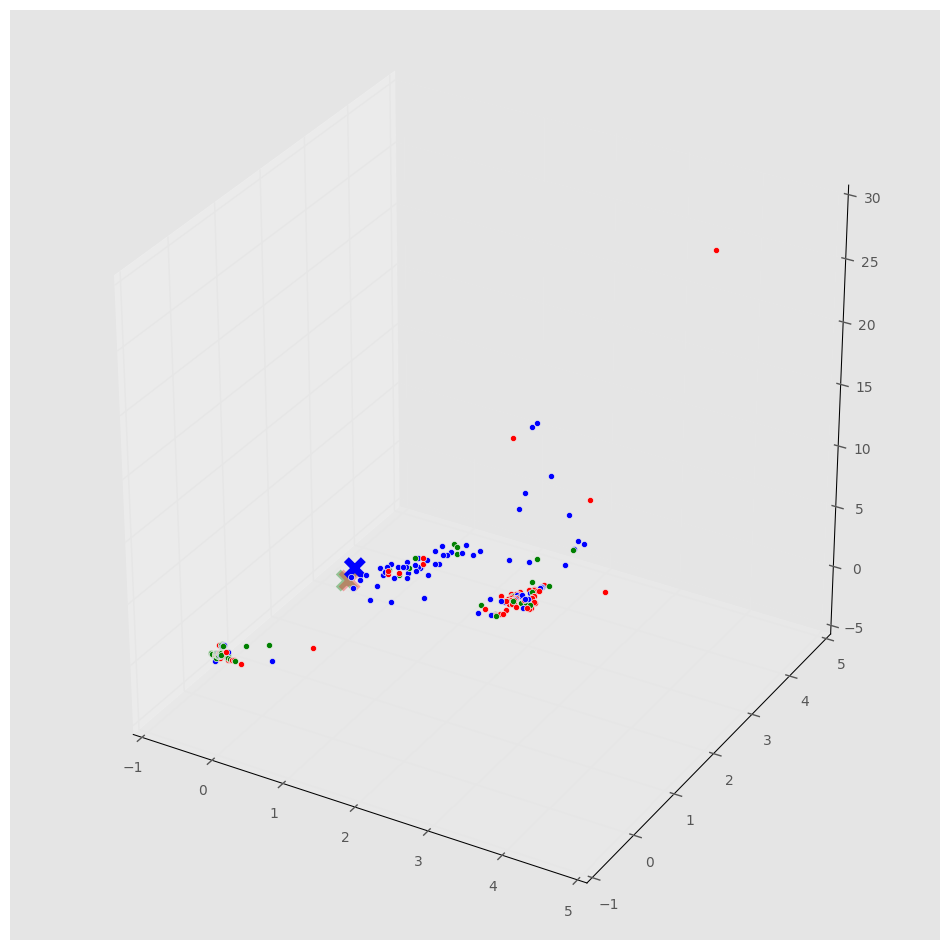

In [64]:
color = ["g", "r", "b"]
fig = figure(figsize=(12, 12), dpi=100)
ax = fig.gca(projection='3d')
for i in range(len(centers_df.x_1)):
    ax.scatter(centers_df.x_1.loc[i], centers_df.y_1.loc[i], centers_df.z_1.loc[i], c=color[0])
    ax.scatter(centers_df.x_2.loc[i], centers_df.y_2.loc[i], centers_df.z_2.loc[i], c=color[1])
    ax.scatter(centers_df.x_3.loc[i], centers_df.y_3.loc[i], centers_df.z_3.loc[i], c=color[2])


ax.scatter(mean_vector_1, mean_vector_2, mean_vector_3, marker = "x", s=150, linewidths = 5, zorder = 100, c=color)
plt.show()

In [65]:
centers_df['d1'] = 0
centers_df['d2'] = 0
centers_df['d3'] = 0
centers_df['time'] = 0
print(centers_df.head())

        x_1       y_1       z_1       x_2       y_2       z_2       x_3  \
0 -0.401228 -0.368359 -0.616871  2.257984  2.246162  0.368047 -0.222944   
1  2.265909  2.362045  0.352500 -0.241098 -0.387683  0.385244 -0.405902   
2  2.041681  2.036965 -0.056224 -0.222114 -0.366600 -0.263475  2.683889   
3  2.402419  2.500737  3.806047 -0.204528 -0.360016 -0.252650  2.027667   
4  2.058617  2.081683 -0.048431 -0.175157 -0.361852 -0.258068  2.688994   

        y_3       z_3  d1  d2  d3  time  
0 -0.359351  0.366502   0   0   0     0  
1 -0.385024 -0.673707   0   0   0     0  
2  3.167153  3.570694   0   0   0     0  
3  2.028057 -0.060294   0   0   0     0  
4  2.919770  3.868879   0   0   0     0  


In [66]:
for item in range(0, len(centers_df)):
    temp_vector_1 = np.array([centers_df.x_1.loc[item], centers_df.y_1.loc[item], centers_df.z_1.loc[item]])
    temp_vector_2 = np.array([centers_df.x_2.loc[item], centers_df.y_2.loc[item], centers_df.z_2.loc[item]])
    temp_vector_3 = np.array([centers_df.x_3.loc[item], centers_df.y_3.loc[item], centers_df.z_3.loc[item]])
    dist_1 = np.linalg.norm(mean_vector_1 - temp_vector_1)
    dist_2 = np.linalg.norm(mean_vector_2 - temp_vector_2)
    dist_3 = np.linalg.norm(mean_vector_3 - temp_vector_3)
    centers_df.d1.loc[item] = dist_1
    centers_df.d2.loc[item] = dist_2
    centers_df.d3.loc[item] = dist_3
    centers_df.time.loc[item] =  item

In [67]:
print(centers_df.describe())

             x_1        y_1        z_1        x_2        y_2        z_2  \
count  88.000000  88.000000  88.000000  88.000000  88.000000  88.000000   
mean    0.322574   0.328514   0.623733   1.472635   1.529199   1.178152   
std     1.072073   1.121669   1.789067   1.183717   1.292116   3.640128   
min    -0.473555  -0.386471  -0.616871  -0.416556  -0.387683  -0.417582   
25%    -0.371384  -0.354715  -0.172407  -0.169767  -0.334170  -0.028875   
50%    -0.328729  -0.340752  -0.065015   2.087650   2.329958   0.272399   
75%     1.364239   1.034567   0.371661   2.217414   2.438872   0.479696   
max     2.682372   2.890350   6.390512   4.110000   4.130000  26.460000   

             x_3        y_3        z_3         d1         d2         d3  \
count  88.000000  88.000000  88.000000  88.000000  88.000000  88.000000   
mean    1.519016   1.358915   3.979448   1.928514   2.596569   3.118263   
std     0.905209   0.974162   3.572903   1.358797   3.082469   2.167648   
min    -0.447411  -0.385

Plotting **'Distance of centroids from their mean vs time'**. This graph essentially shows how 3 centroids of cluster changes with the increase in time. For comparison we first find the mean value out of all 88 centroids and then find the distance of each centroid from this mean value. If with increase in time the graph shows a straight horizontal line, then it means its the same microbes concentration under the sea over the cruise travel. But if the graph shows spikes that means the type of microbes are changing over time.

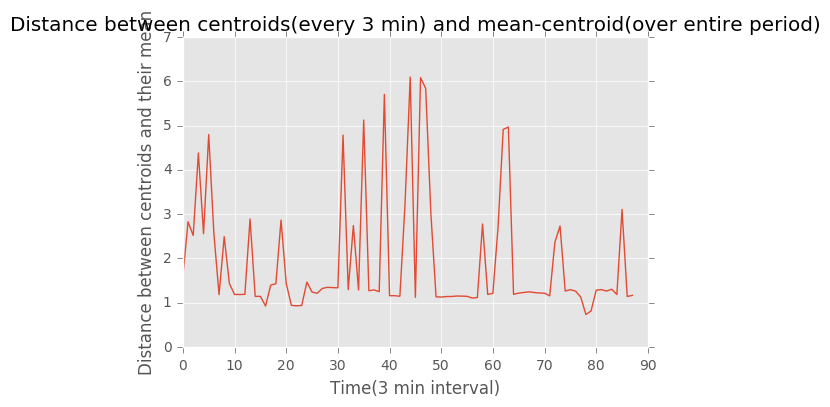

In [68]:
plt.plot(centers_df.time, centers_df.d1)
plt.title('Distance between centroids(every 3 min) and mean-centroid(over entire period)')
plt.ylabel('Distance between centroids and their mean')
plt.xlabel('Time(3 min interval)')
plt.show()          

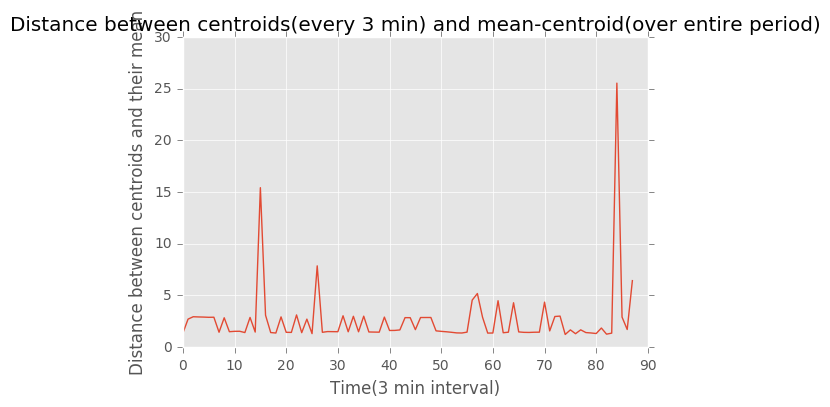

In [69]:
plt.plot(centers_df.time, centers_df.d2)
plt.title('Distance between centroids(every 3 min) and mean-centroid(over entire period)')
plt.ylabel('Distance between centroids and their mean')
plt.xlabel('Time(3 min interval)')
plt.show() 

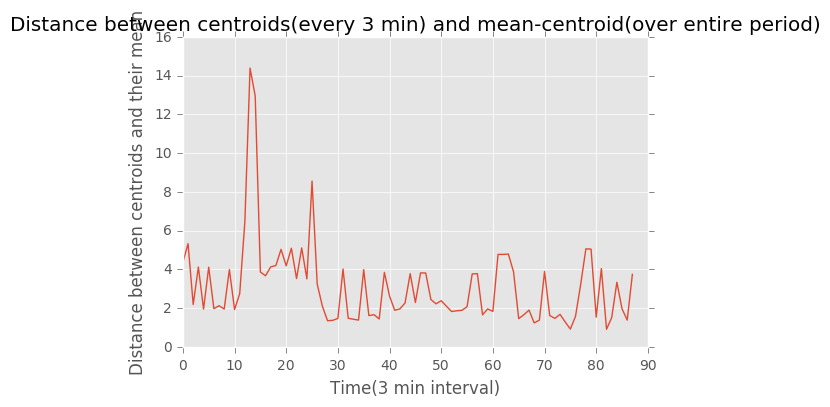

In [70]:
plt.plot(centers_df.time, centers_df.d3)
plt.title('Distance between centroids(every 3 min) and mean-centroid(over entire period)')
plt.ylabel('Distance between centroids and their mean')
plt.xlabel('Time(3 min interval)')
plt.show()